### Projeto de Análise Exploratório de dados com Python e SQL

Neste Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no [IMDB](https://www.imdb.com/interfaces/).

Para aprender mais sobre Linguagem SQL:

- [SQLZOO](https://sqlzoo.net/wiki/SQL_Tutorial)
- [Curso Bancos de Dados SQL e NoSQL](https://www.udemy.com/course/curso-de-banco-de-dados-do-basico-ao-avancado/)

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

### Instalando e carregando as bibliotecas

In [3]:
# Instalando o pacote 
!pip install -q imdb-sqlite

In [4]:
# Instalando o pacote pycountry
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [1]:
# Importando as libs
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')

### Carregando os dados
Baixando os dados

In [7]:
%%time
!imdb-sqlite

Wall time: 33min


2022-09-06 11:59:18,250 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-09-06 11:59:26,916 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-09-06 11:59:30,212 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-09-06 11:59:35,990 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-09-06 11:59:49,708 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-09-06 11:59:52,364 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-09-06 11:59:54,127 Populating database: imdb.db
2022-09-06 11:59:54,132 Applying schema
2022-09-06 11:59:54,140 Importing file: downloads\name.basics.tsv.gz
2022-09-06 11:59:54,140 Reading number of rows ...
2022-09-06 11:59:59,490 Inserting rows into table: people

 27%|##6       | 3165051/11906873 [00:37<01:43, 84811.97 rows/s]


 53%|#####2    | 6261412/11906873 [01:14<01:07, 83357.40 rows/s]


100%|##########| 11906873/11906873 [02:23<00:00, 83027.23 rows/s]
2022-09-06 12:02:22,939 Importing file: downloads\title.basics.tsv.gz
2022-09-06 12:02:22,939 Reading number of rows ...
2022-09-06 12:02:27,244 Inserting rows into table: titles

 54%|#####3    | 4928172/9204231 [01:13<01:03, 67379.05 rows/s]


100%|##########| 9204231/9204231 [02:18<00:00, 66579.27 rows/s]
2022-09-06 12:04:45,495 Importing file: downloads\title.akas.tsv.gz
2022-09-06 12:04:45,495 Reading number of rows ...
2022-09-06 12:04:54,107 Inserting rows into table: akas

  5%|4         | 1625260/33154986 [00:18<06:00, 87367.98 rows/s]


 42%|####2     | 14048042/33154986 [02:40<03:38, 87248.49 rows/s]


 56%|#####6    | 18645519/33154986 [03:32<02:47, 86649.95 rows/s]


100%|##########| 33154986/33154986 [06:21<00:00, 86874.99 rows/s]
2022-09-06 12:11:15,754 Importing file: downloads\title.principals.tsv.gz
2022-09-06 12:11:15,754 Reading number of rows ...
2022-09-06 12:11:27,567 Inserting rows into table: crew

  1%|1         | 739298/51946658 [00:06<08:01, 106370.40 rows/s]


 12%|#1        | 6190439/51946658 [00:57<06:57, 109726.95 rows/s]


 49%|####9     | 25534464/51946658 [04:03<04:10, 105534.84 rows/s]


 59%|#####9    | 30884638/51946658 [04:55<03:21, 104597.43 rows/s]


 67%|######6   | 34779597/51946658 [05:33<02:43, 104934.49 rows/s]


 78%|#######7  | 40272899/51946658 [06:27<01:51, 104410.64 rows/s]


100%|##########| 51946658/51946658 [08:16<00:00, 104684.74 rows/s]
2022-09-06 12:19:43,793 Importing file: downloads\title.episode.tsv.gz
2022-09-06 12:19:43,794 Reading number of rows ...
2022-09-06 12:19:44,767 Inserting rows into table: episodes

100%|##########| 6938716/6938716 [00:52<00:00, 131150.88 rows/s]
2022-09-06 12:20:37,680 Importing file: downloads\title.ratings.tsv.gz
2022-09-06 12:20:37,680 Reading number of rows ...
2022-09-06 12:20:37,826 Inserting rows into table: ratings

 50%|####9     | 626402/1259148 [00:05<00:05, 111453.16 rows/s]


100%|##########| 1259148/1259148 [00:11<00:00, 112890.65 rows/s]
2022-09-06 12:20:48,986 Creating table indices ...
2022-09-06 12:32:18,098 Import successful


In [2]:
# Conecta no banco de dados
conn = sqlite3.connect('imdb.db')

In [3]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [4]:
# Tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [11]:
# Visualizar o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [12]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas['Table_Name'].values.tolist()

In [13]:
# Visualizar o resultado
tabelas

['people', 'titles', 'akas', 'crew', 'episodes', 'ratings']

In [16]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = 'PRAGMA TABLE_INFO({})'.format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print('Esquema da tabela', tabela)
    display(resultado)
    print('-'*70)
    print('\n')

Esquema da tabela people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------


Esquema da tabela titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------


Esquema da tabela akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------


Esquema da tabela crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------


Esquema da tabela episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------


Esquema da tabela ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------




#### Agora vamos começar a Análise Exploratória dos dados

### 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
Quais são os principais tipos (categorias) dos títulos (filmes)?

In [26]:
# Cria a consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [27]:
# Extrair o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [28]:
# Visualizar o resultado
display(resultado1)

,type,COUNT
0,movie,620400
1,short,887757
2,tvEpisode,6937141
3,tvMiniSeries,44992
4,tvMovie,137462
5,tvPilot,2
6,tvSeries,230568
7,tvShort,10657
8,tvSpecial,38182
9,video,264979


In [29]:
# Vamos calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum())*100

In [30]:
# Visualizar o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,620400,6.740378
1,short,887757,9.645097
2,tvEpisode,6937141,75.369045
3,tvMiniSeries,44992,0.488819
4,tvMovie,137462,1.493465
5,tvPilot,2,0.000022
6,tvSeries,230568,2.505022
7,tvShort,10657,0.115784
8,tvSpecial,38182,0.414831
9,video,264979,2.878883


In [41]:
# Ordenando os valores
resultado1.sort_values(by=['COUNT'], ascending=False)

,type,COUNT,percentual
2,tvEpisode,6937141,75.369045
1,short,887757,9.645097
0,movie,620400,6.740378
9,video,264979,2.878883
6,tvSeries,230568,2.505022
4,tvMovie,137462,1.493465
3,tvMiniSeries,44992,0.488819
8,tvSpecial,38182,0.414831
10,videoGame,32091,0.348655
7,tvShort,10657,0.115784


In [44]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionario vazio
others = {}

# Filtra o percentual em 5% e somar total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [45]:
# Visualizar
others

{'COUNT': 758933, 'percentual': 8.245479714709463, 'type': 'others'}

In [46]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [49]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index=True)

In [51]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by='COUNT', ascending=False)

In [52]:
# Visualizar
resultado1.head()

,type,COUNT,percentual
0,tvEpisode,6937141,75.369045
1,short,887757,9.645097
3,others,758933,8.245480
2,movie,620400,6.740378


In [53]:
# Ajusta as labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

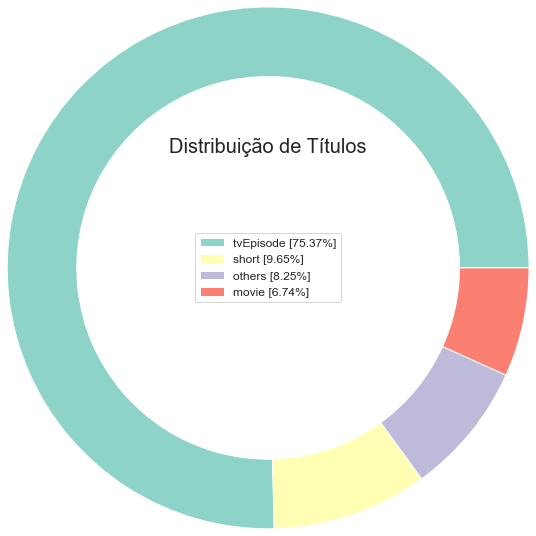

In [55]:
# Plot gráfico

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

### 2- Qual o Número de Títulos Por Gênero?

In [74]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [75]:
# Extrair o resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [76]:
# Visualizar 
display(resultado2)

,genres,COUNT(*)
0,Action,14176
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",6
4,"Action,Adult,Crime",9
...,...,...
1462,"Thriller,Western",43
1463,War,1312
1464,"War,Western",14
1465,Western,5146


In [77]:
# Converter as strings para minusculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [78]:
# Removendo valores NA (ausentes)
temp = resultado2['genres'].dropna()

In [79]:
# Vamos criar um vetor usando expressão regular para filtrar as strings
padrao = '(?u)\\b[\\w-]+\\b'

vetor = CountVectorizer(token_pattern=padrao, analyzer='word').fit(temp)

In [80]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [81]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [82]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [83]:
# Retorna gêneros únicos
generos_unico = vetor.get_feature_names()

In [84]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns=generos_unico, index= temp.index)

In [85]:
# Visualizar
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1467 non-null   int64
 1   adult        1467 non-null   int64
 2   adventure    1467 non-null   int64
 3   animation    1467 non-null   int64
 4   biography    1467 non-null   int64
 5   comedy       1467 non-null   int64
 6   crime        1467 non-null   int64
 7   documentary  1467 non-null   int64
 8   drama        1467 non-null   int64
 9   family       1467 non-null   int64
 10  fantasy      1467 non-null   int64
 11  film-noir    1467 non-null   int64
 12  game-show    1467 non-null   int64
 13  history      1467 non-null   int64
 14  horror       1467 non-null   int64
 15  music        1467 non-null   int64
 16  musical      1467 non-null   int64
 17  mystery      1467 non-null   int64
 18  n            1467 non-null   int64
 19  news         1467 non-null   int64
 20  reality-

In [86]:
# Drop da coluna n
generos = generos.drop(columns='n', axis=0)

In [87]:
# Calcular o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending=False) / generos.shape[0]

In [90]:
# Visualizar
generos_percentual.head(10)

drama          17.927744
comedy         16.973415
documentary    15.882754
adventure      14.792093
action         14.383095
romance        13.292434
crime          13.019768
mystery        12.406271
thriller       12.269939
horror         12.269939
dtype: float64

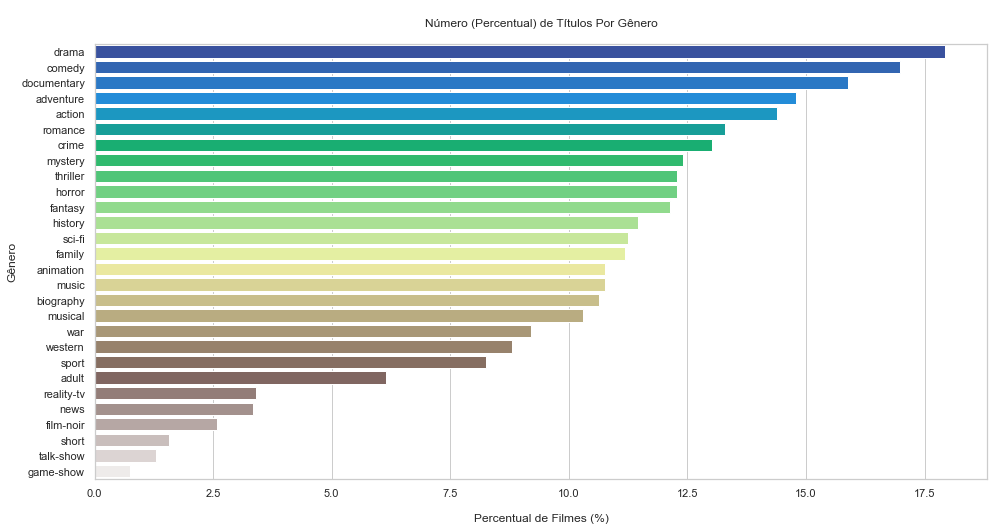

In [91]:
# Plot
plt.figure(figsize=(16,8))
sns.barplot(x= generos_percentual.values, y= generos_percentual.index, orient='h', palette='terrain')
plt.ylabel('Gênero')
plt.xlabel('\nPercentual de Filmes (%)')
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

### 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

In [4]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            '''

In [8]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [9]:
# Visualizar
display(resultado3)

,rating,genres
0,5.2,Romance
1,3.7,\N
2,6.0,"Action,Adventure,Biography"
3,4.0,Drama
4,4.1,Drama
...,...,...
281855,5.8,Thriller
281856,6.4,"Drama,History"
281857,3.8,"Adventure,History,War"
281858,8.3,Drama


In [25]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [13]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [14]:
# Visualizar 
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [23]:
# Criar listas vazias
genero_counts = []
genero_rating = []

In [24]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
    # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_rating.append(np.median(resultado['rating']))

In [28]:
# Prepara o dataframe final
df_genero_rating = pd.DataFrame()
df_genero_rating['genres'] = generos_unicos
df_genero_rating['count'] = genero_counts
df_genero_rating['rating'] = genero_rating

In [30]:
# Visualizar 
df_genero_rating.head(20)

,genres,count,rating
0,action,29208,5.8
1,adult,4402,5.8
2,adventure,17672,6.0
3,animation,4841,6.6
4,biography,8610,7.0
5,comedy,69571,6.0
6,crime,24111,6.1
7,documentary,42420,7.3
8,drama,124848,6.3
9,family,10863,6.3


In [33]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_rating = df_genero_rating.drop(index = 18)

In [34]:
# Ordena o resultado
df_genero_rating = df_genero_rating.sort_values(by = 'rating', ascending = False)

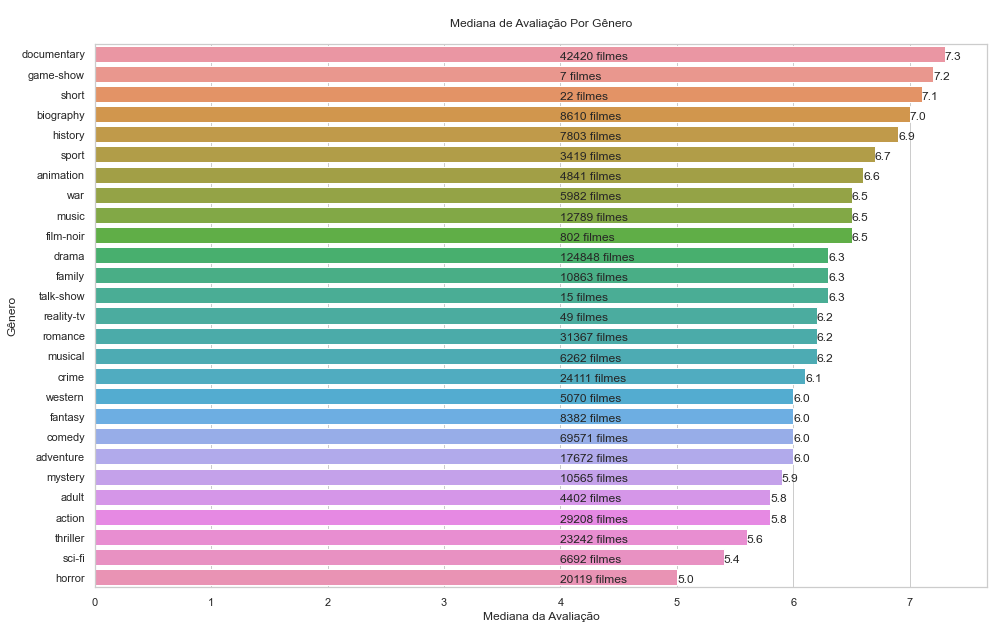

In [35]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_rating.genres, x = df_genero_rating.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_rating.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_rating['count'][df_genero_rating.index[i]]) + " filmes")
    
    plt.text(df_genero_rating.rating[df_genero_rating.index[i]],
             i + 0.25,
             round(df_genero_rating["rating"][df_genero_rating.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

### 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

In [5]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            '''

In [6]:
# Retornando os valores
resultado4 = pd.read_sql_query(consulta4, conn)

In [7]:
# Vizualisando 
resultado4

,Rating,premiered
0,5.2,1894
1,6.2,1896
2,4.4,1897
3,3.9,1899
4,3.2,1899
...,...,...
281855,7.9,2022
281856,6.8,2022
281857,5.3,2022
281858,3.9,2022


In [15]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [16]:
type(ratings)

list

In [17]:
ratings[1:10]

[6.2, 4.4, 3.55, 5.35, 4.1, 3.4, 4.0, 5.3, 3.8]

In [18]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [19]:
anos[1:10]

[1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905]

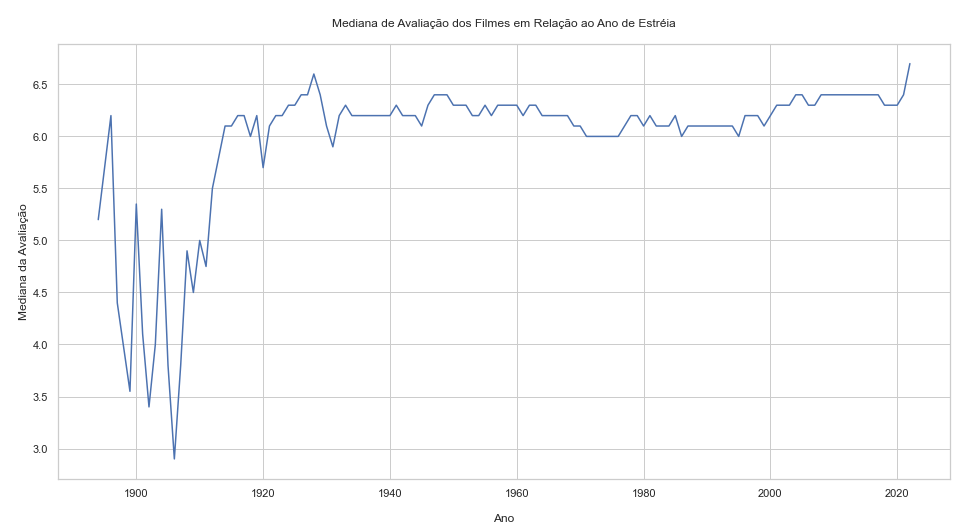

In [24]:
# Plot
plt.figure(figsize=(16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('\nMediana da Avaliação')
plt.title('\nMediana de Avaliação dos Filmes em Relação ao Ano de Estréia\n')
plt.show()

### 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

In [26]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles'''

In [27]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [28]:
# Visualizar 
resultado5

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9204226,"Action,Drama,Family"
9204227,"Action,Drama,Family"
9204228,"Action,Drama,Family"
9204229,Short


In [29]:
# Retornar generos unicos
generos_unicos = retorna_generos(resultado5)

In [30]:
# Agora farei a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [32]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [33]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by= 'Count', ascending= False)
top_generos = df_genero_count.head()['genre'].values

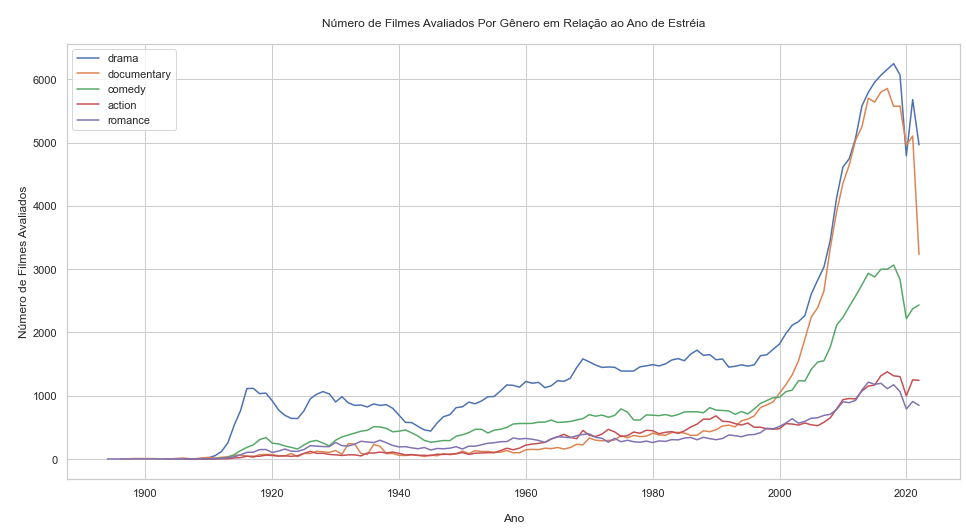

In [37]:
# Plot

# Figura
plt.figure(figsize=(16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])


plt.xlabel('\nAno')
plt.ylabel('\nNúmero de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

### 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

In [38]:
# Consulta ao SQL
consulta6 = '''
            SELECT runtime_minutes Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [39]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [40]:
# Visualizar
resultado6

,Runtime
0,45
1,100
2,70
3,90
4,120
...,...
391535,123
391536,57
391537,100
391538,116


In [57]:
# Loop para calculo dos percentis
for i in range(101):
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [58]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [59]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [60]:
# Visualizar
resultado6

,Runtime,primary_title
0,51420,Logistics


Logistics, ou Logistics Art Project, é um filme experimental sueco de 2012 concebido e criado por Erika Magnusson e Daniel Andersson. Com 51.420 minutos, é o filme mais longo já feito.

### 7- Qual a Relação Entre Duração e Gênero?

In [72]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [73]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [74]:
# Visualizar
resultado7

,Runtime,genres
0,99.366548,Action
1,77.000000,"Action,Adult"
2,85.000000,"Action,Adult,Adventure"
3,76.400000,"Action,Adult,Comedy"
4,85.375000,"Action,Adult,Crime"
...,...,...
1381,95.266667,"Thriller,Western"
1382,93.867099,War
1383,90.000000,"War,Western"
1384,70.000991,Western


In [75]:
# Retorna generos unicos
generos_unicos = retorna_generos(resultado7)

In [76]:
# Visualizar
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [77]:
# Calcula duração por genero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [78]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [79]:
# Remove indice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index=18)

In [80]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

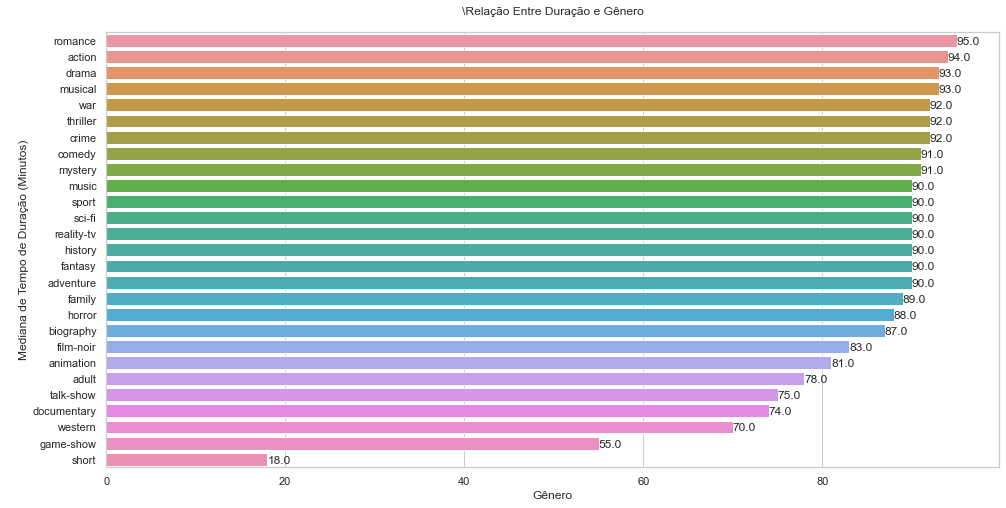

In [81]:
# Plot

# Figura
plt.figure(figsize=(16,8))

# Barplot
sns.barplot(y=df_genero_runtime.genre, x=df_genero_runtime.runtime, orient='h')

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
            i + 0.25,
            round(df_genero_runtime['runtime'][df_genero_runtime.index[i]], 2))
    
plt.xlabel('Gênero')
plt.ylabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\Relação Entre Duração e Gênero\n')
plt.show()

### 8- Qual o Número de Filmes Produzidos Por País?

In [82]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [83]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [84]:
display(resultado8)

,region,Number_of_movies
0,AD,21
1,AE,7627
2,AF,110
3,AG,12
4,AL,1298
...,...,...
230,YUCS,153
231,ZA,7988
232,ZM,18
233,ZRCD,2


In [85]:
# Shape
resultado8.shape

(235, 2)

In [86]:
# Número de linhas
resultado8.shape[0]

235

In [87]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [88]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [89]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [90]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [91]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
200,United States,316899
66,United Kingdom,161268
97,Japan,93362
64,France,86134
90,India,86061
32,Canada,81485
48,Germany,72614
59,Spain,67230
94,Italy,66628
26,Brazil,66531


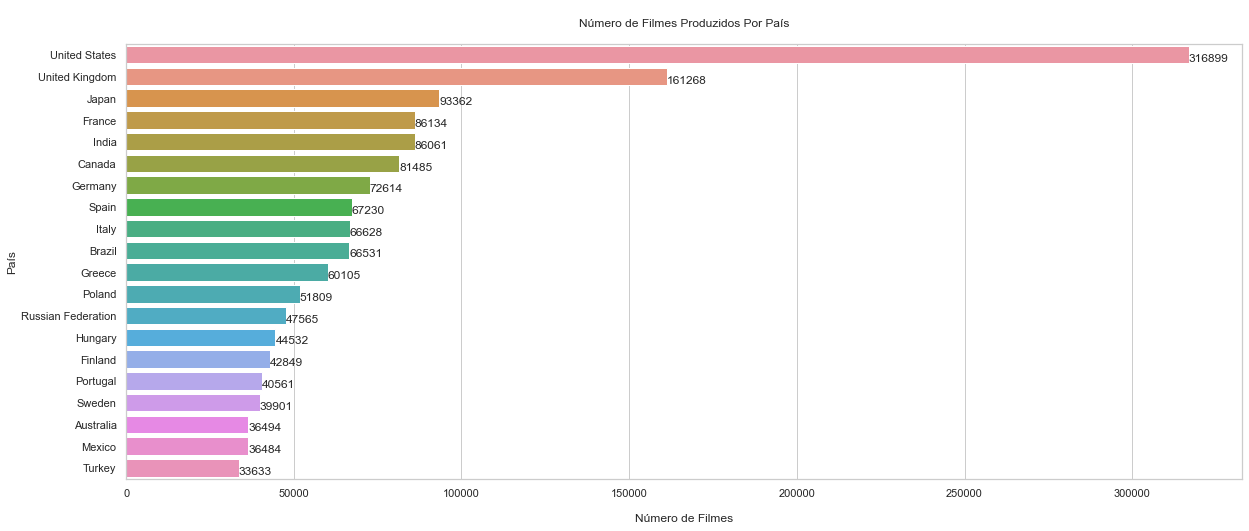

In [92]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

### 9- Quais São os Top 10 Melhores Filmes?

In [93]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [94]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [95]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


### 10- Quais São os Top 10 Piores Filmes?

In [96]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [97]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [98]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9
